# Regularized Method for Regression

## Ridge Regression

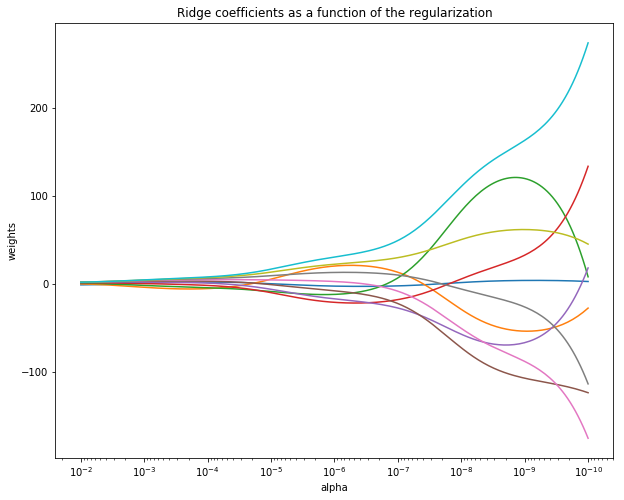

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = 1. / (np.arange(1,11) + np.arange(0,10)[:,np.newaxis])
y = np.ones(10)

## Compute Paths

n_alphas = 200
alphas = np.logspace(-10,-2,n_alphas)

coefs = []

for a in alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)
    
# Display Results

plt.figure(figsize = (10,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Outliers Impact

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

## Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

Coefficient Estimate:  [0.47134857]


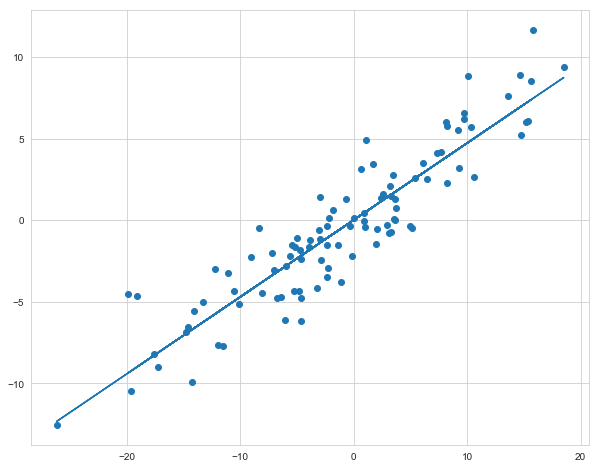

In [7]:
np.random.seed(42)
n_samples = 100

rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

lr = LinearRegression()
lr.fit(rng.reshape(-1,1), y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize = (10,8))
plt.scatter(rng,y_gen)
plt.plot(rng, model_pred)
print('Coefficient Estimate: ', lr.coef_)

In [8]:
idx = rng.argmax()
y_gen[idx] = 200

Coefficient Estimate:  [0.92796845]


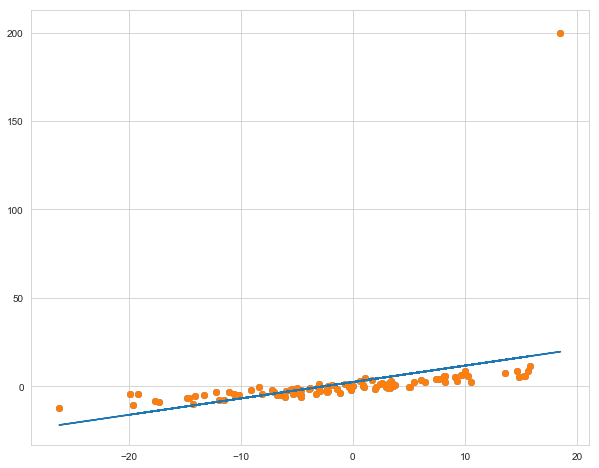

In [9]:
plt.figure(figsize = (10,8))
plt.scatter(rng,y_gen)

o_lr = LinearRegression(normalize = True)
o_lr.fit(rng.reshape(-1,1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen)
plt.plot(rng,o_model_pred)
print('Coefficient Estimate: ', o_lr.coef_)

## Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

Coffecient Estimate:  [0.46398423]


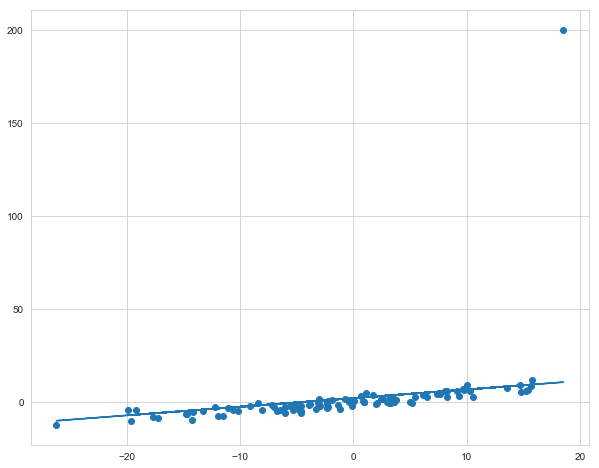

In [13]:
plt.figure(figsize = (10,8))

ridge_mod = Ridge(alpha = 1, normalize = True)
ridge_mod.fit(rng.reshape(-1,1), y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen)
plt.plot(rng, ridge_model_pred)
print('Coffecient Estimate: ', ridge_mod.coef_)

## Lasso Regression

In [15]:
from sklearn.linear_model import Lasso

Coffecient Estimate:  [0.48530263]


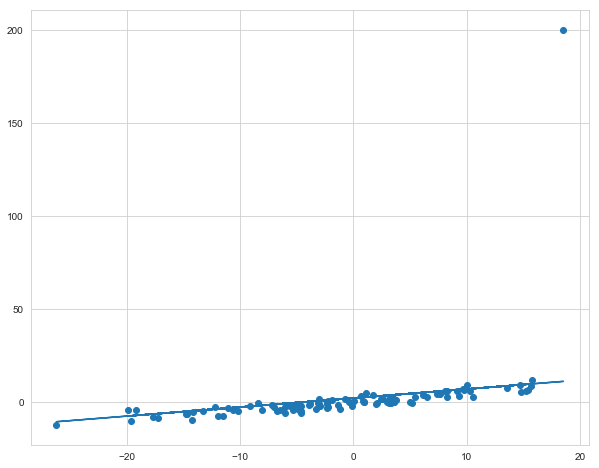

In [16]:
plt.figure(figsize = (10,8))

lasso_mod = Lasso(alpha = 0.4, normalize = True)
lasso_mod.fit(rng.reshape(-1,1), y_gen)
lasso_model_pred = lasso_mod.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen)
plt.plot(rng, lasso_model_pred)
print('Coffecient Estimate: ', lasso_mod.coef_)

## Elastic Net Regression

In [17]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [0.4584509]


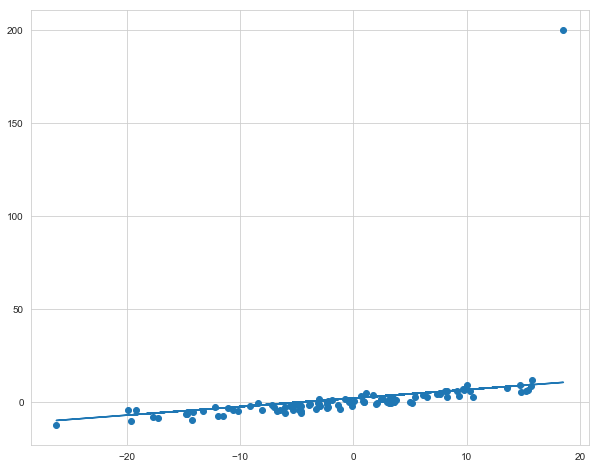

In [18]:
plt.figure(figsize = (10,8))

en_mod = ElasticNet(alpha = 0.02, normalize = True)
en_mod.fit(rng.reshape(-1,1), y_gen)
en_model_pred = en_mod.predict(rng.reshape(-1,1))

plt.scatter(rng,y_gen)
plt.plot(rng,en_model_pred)
print('Coefficient Estimate: ', en_mod.coef_)

# Summary

When to use each:

Ridge regression can't zero out coefficients. Either include all coefficients or none.

Lasso does both parameter shrinkage and variable selection automatically.

If some covariates are highly correlated, use Elastic Net instead of Lasso.

In [19]:
idx = rng.argmin()
y_gen[idx] = -200

Coefficient Estimate:  [1.50556072]


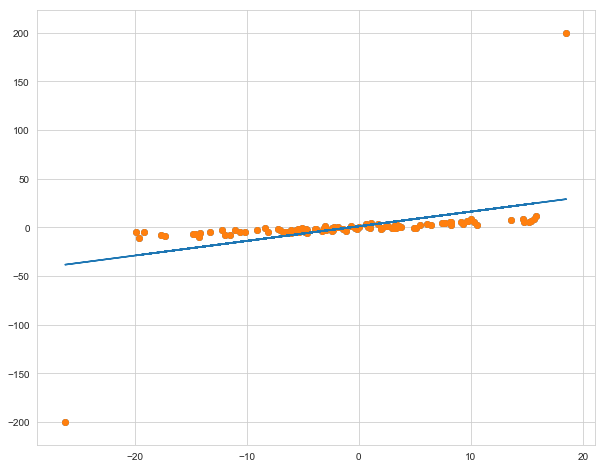

In [20]:
plt.figure(figsize = (10,8))
plt.scatter(rng,y_gen)

o_lr = LinearRegression(normalize = True)
o_lr.fit(rng.reshape(-1,1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen)
plt.plot(rng,o_model_pred)
print('Coefficient Estimate: ', o_lr.coef_)

Coffecient Estimate:  [1.36869156]


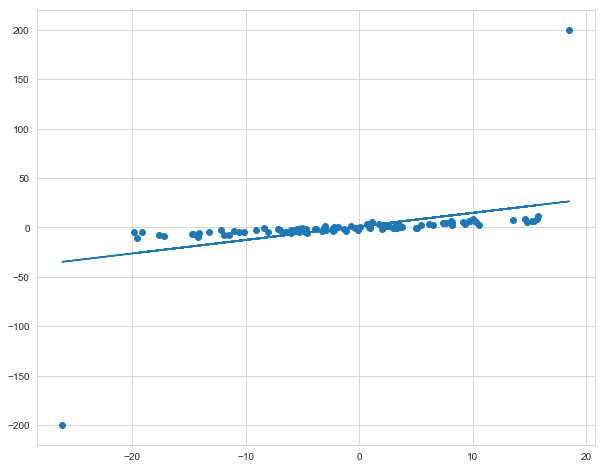

In [21]:
plt.figure(figsize = (10,8))

ridge_mod = Ridge(alpha = .1, normalize = True)
ridge_mod.fit(rng.reshape(-1,1), y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen)
plt.plot(rng, ridge_model_pred)
print('Coffecient Estimate: ', ridge_mod.coef_)

Coffecient Estimate:  [0.84156198]


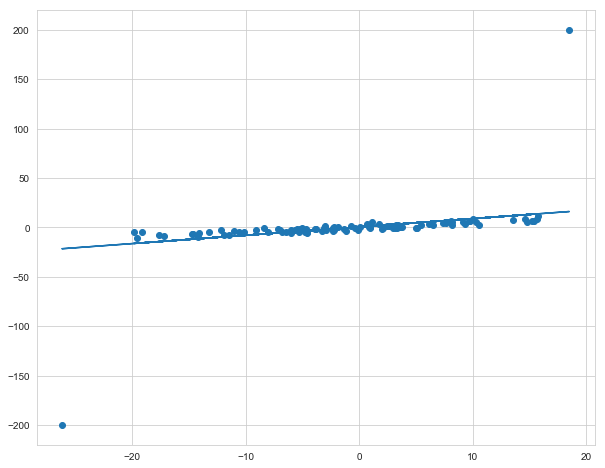

In [22]:
plt.figure(figsize = (10,8))

lasso_mod = Lasso(alpha = 0.6, normalize = True)
lasso_mod.fit(rng.reshape(-1,1), y_gen)
lasso_model_pred = lasso_mod.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen)
plt.plot(rng, lasso_model_pred)
print('Coffecient Estimate: ', lasso_mod.coef_)

Coefficient Estimate:  [0.42225546]


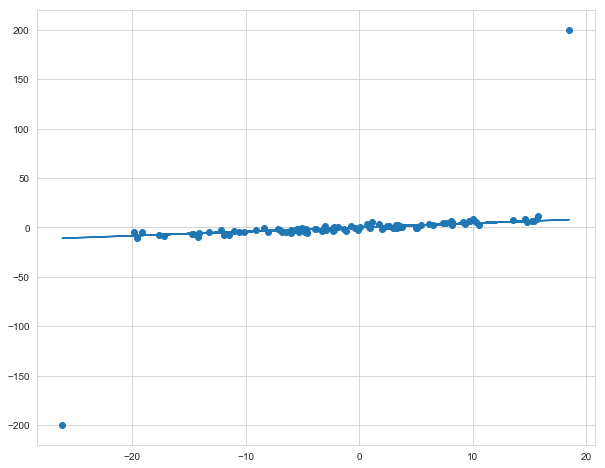

In [24]:
plt.figure(figsize = (10,8))

en_mod = ElasticNet(alpha = 0.05, normalize = True)
en_mod.fit(rng.reshape(-1,1), y_gen)
en_model_pred = en_mod.predict(rng.reshape(-1,1))

plt.scatter(rng,y_gen)
plt.plot(rng,en_model_pred)
print('Coefficient Estimate: ', en_mod.coef_)